
Descriptive Statistics for 'Age':
count    15.000000
mean     31.933333
std       6.204453
min      22.000000
25%      27.500000
50%      31.000000
75%      35.500000
max      45.000000
Name: Age, dtype: float64
Skewness: 0.47
Kurtosis: -0.11


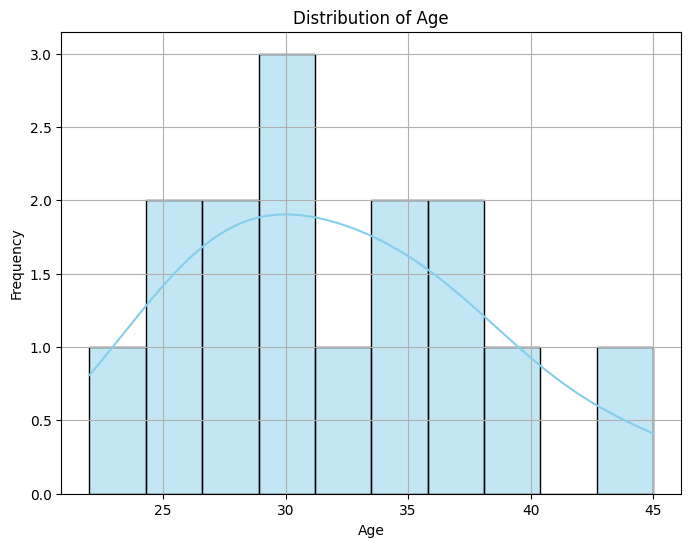


Descriptive Statistics for 'Salary':
count       15.000000
mean     53600.000000
std      12152.601133
min      35000.000000
25%      45000.000000
50%      52000.000000
75%      60500.000000
max      80000.000000
Name: Salary, dtype: float64
Skewness: 0.59
Kurtosis: 0.10


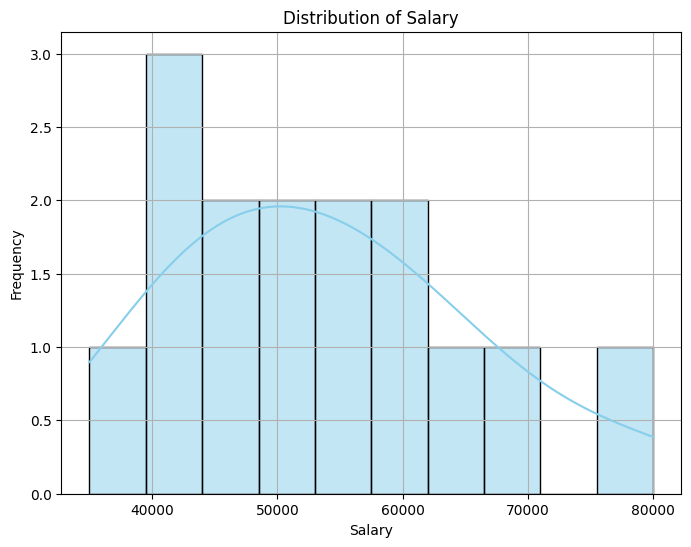

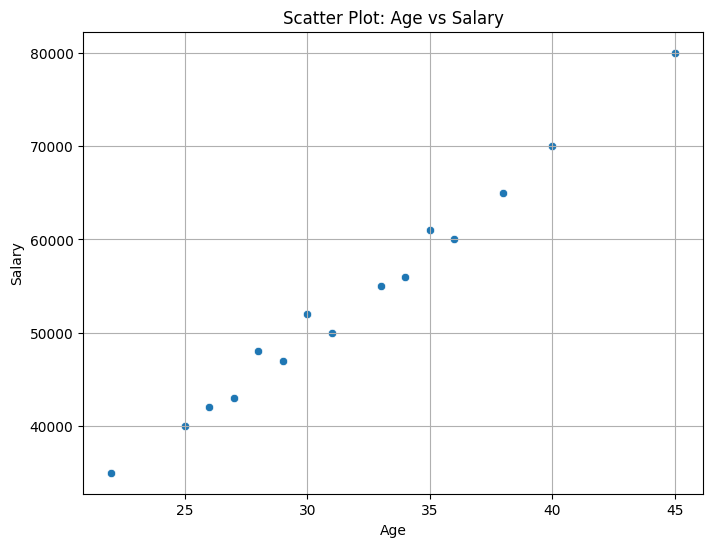

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset (can be replaced with your own)
data = {
    'Age': [25, 30, 22, 40, 28, 35, 38, 31, 29, 45, 27, 26, 33, 34, 36],
    'Salary': [40000, 52000, 35000, 70000, 48000, 61000, 65000, 50000, 47000, 80000, 43000, 42000, 55000, 56000, 60000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

def analyze_distribution(df, column_names):
    if df.empty:
        print("The dataset is empty.")
        return

    for column in column_names:
        if column not in df.columns:
            print(f"Column '{column}' not found in the dataset.")
            continue

        if not pd.api.types.is_numeric_dtype(df[column]):
            print(f"Column '{column}' is not numeric.")
            continue

        if df[column].dropna().empty:
            print(f"Column '{column}' has no valid (non-missing) values.")
            continue

        print(f"\nDescriptive Statistics for '{column}':")
        print(df[column].describe())
        print(f"Skewness: {df[column].skew():.2f}")
        print(f"Kurtosis: {df[column].kurt():.2f}")

        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True, bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    # Optional: Scatter plot for correlation if exactly two columns provided
    if len(column_names) == 2:
        col1, col2 = column_names
        if (col1 in df.columns and col2 in df.columns and
            pd.api.types.is_numeric_dtype(df[col1]) and
            pd.api.types.is_numeric_dtype(df[col2])):
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df[col1], y=df[col2])
            plt.title(f'Scatter Plot: {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.grid(True)
            plt.show()

# Run the analysis on one or more columns
analyze_distribution(df, ['Age', 'Salary'])
